<a href="https://colab.research.google.com/github/RinaHariyanti/PCVK_Genap_2023/blob/main/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

### **Konvolusi tanpa Library**

####**Membuat fungsi konvolusi**
Fungsi konvolusi yang dibuat memiliki parameter berupa:
1. citra masukan, 
2. kernel berupa matriks untuk memfilter citra,
3. nilai stride/besarnya pergeseran untuk setiap konvolusi,
4. nilai pad yang ditambahkan pada citra

In [58]:
def convolution2d(image, kernel, stride, padding):
  image = np.pad(image, padding, mode='constant', constant_values=0)

  kernel_height, kernel_width = kernel.shape
  padded_height, padded_width = image.shape

  output_height = (padded_height - kernel_height) // stride + 1
  output_width = (padded_width - kernel_width) // stride + 1

  new_image = np.zeros((output_height, output_width)).astype(np.float32)

  # convolution process
  for y in range(0, output_height):
    for x in range(0, output_width):
      new_image[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel).astype(np.float32)
      
  return new_image  

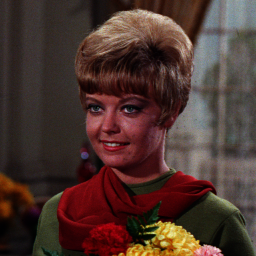

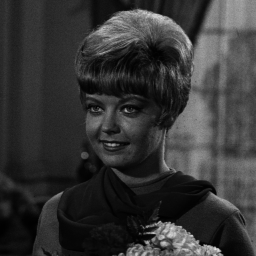

In [59]:
ori_img = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
# load citra yang akan diproses dan mengubah menjadi citra keabuan
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
cv2_imshow(ori_img)
cv2_imshow(img_gray)

In [61]:
#menentuan kernel yang akan digunakan
  #image sharpen
kernel_sharpen = np.array([[0,-1,0],
                          [-1,5,-1],
                          [0,-1,0]])
  #memanggil fungsi konvolusi dan menerapkan setiap filter yang telah ditentukan
#cv2_imshow(convolution2d(img_gray, kernel_sharpen,1,2))

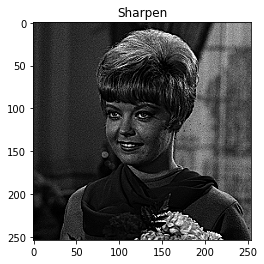

In [63]:
#Sharpen
img_sharpen = img_gray.copy()
img_sharpen = convolution2d(img_sharpen, kernel_sharpen,1,0)

plt.title("Sharpen")
plt.imshow(img_sharpen, cmap='gray',vmin=0, vmax=255)

**Emboss**

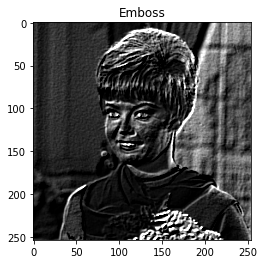

In [65]:
emboss = np.array([[-2,-1,0],
                   [-1,1,1],
                   [0,1,2]])
img_emboss = img_gray.copy()
img_emboss = convolution2d(img_emboss, emboss,1,0)

plt.title("Emboss")
plt.imshow(img_emboss, cmap='gray',vmin=0, vmax=255)

**Left Sobel Edge Detection**

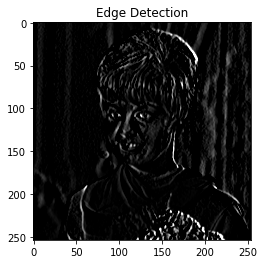

In [69]:
left_edge_detection = np.array([[1,0,-1],
                           [2,0,-2],
                           [1,0,-1]])
img_left_edgedetec = img_gray.copy()
img_left_edgedetec = convolution2d(img_left_edgedetec, left_edge_detection,1,0)

plt.title("Edge Detection")
plt.imshow(img_left_edgedetec, cmap='gray',vmin=0, vmax=255)

**Canny Edge Detection**

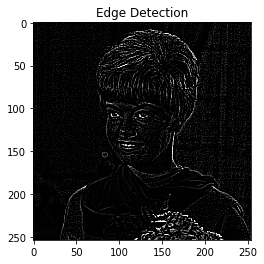

In [70]:
cancy_edge_detection = np.array([[-1,-1,-1],
                                 [-1,8,-1],
                                 [-1,-1,-1]])
img_cancy_edgedetec = img_gray.copy()
img_cancy_edgedetec = convolution2d(img_cancy_edgedetec, cancy_edge_detection,1,0)

plt.title("Edge Detection")
plt.imshow(img_cancy_edgedetec, cmap='gray',vmin=0, vmax=255)

**Prewitt Edge Detection**

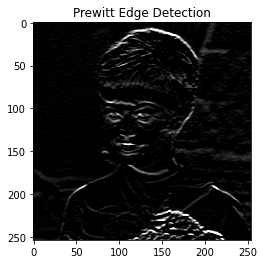

In [71]:
Prewitt_ED = np.array([[-1,-1,-1],
                        [0,0,0],
                        [1,1,1]])
img_prewitt_ed = img_gray.copy()
img_prewitt_ed = convolution2d(img_prewitt_ed, Prewitt_ED,1,0)

plt.title("Prewitt Edge Detection")
plt.imshow(img_prewitt_ed, cmap='gray',vmin=0, vmax=255)

**5x5 Gaussian Blur**

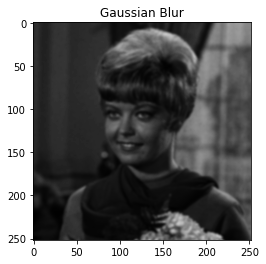

In [76]:
# Gausian Blur
gausianBlur = np.array ([[1,4,6,4,1],
                        [4,16,24,16,4],
                        [6,24,36,24,6],
                        [4,16,24,16,4],
                        [1,4,6,4,1]]) * 1/256
img_gausian_blur = img_gray.copy()
img_gausian_blur = convolution2d(img_gausian_blur, gausianBlur,1,0)

plt.title("Gaussian Blur")
plt.imshow(img_gausian_blur, cmap='gray',vmin=0, vmax=255)

**21x21 Gaussian Blur**

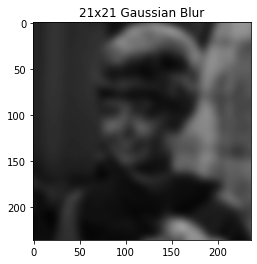

In [77]:
kernel_size = 21
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel((kernel_size), sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

img_blur = img_gray.copy()
img_blur = convolution2d(img_blur, gauss_kernel,1,0)

plt.title("21x21 Gaussian Blur")
plt.imshow(img_blur, cmap='gray',vmin=0, vmax=255)
# cv2_imshow(img_blur)